# 实验3  神经网络

### 一、实验目的

掌握多层感知器（多层前馈神经网络）和反向传播算法的原理与应用，熟悉Scikit-learn中神经网络模型的使用。  

### 二、实验内容

####  1.Scikit-learn中神经网络模型类库介绍

#### （1）MLPClassifier 类

MLPClassifier 类实现了通过 Backpropagation 进行训练的多层感知器（MLP）算法，最小化交叉熵损失函数（包含正则项）：

$$Loss\left(\hat{y},y,W\right) = -y \ln {\hat{y}} - (1-y) \ln{(1-\hat{y})} + \alpha ||W||_2^2$$

$$W^{i+1} = W^i - \epsilon \nabla {Loss}_{W}^{i}$$

函数说明：

class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

主要参数：

1）hidden_layer_sizes—隐层的神经元个数：元组，*i*th元素表示第*i*th隐层的神经元个数，设定网络结构。

2）activation—隐层单元激活函数类型：默认’relu’，取值有{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}。

3）solver—权重优化算法（求解器）：默认‘adam’，取值有{‘lbfgs’, ‘sgd’, ‘adam’}，‘sgd’随机梯度下降。

4）learning_rate_init—学习率：默认0.001，仅solver=’sgd’ or ‘adam’时有效。
  

#### （2） MLPRegressor 类
MLPRegressor 类实现了通过 Backpropagation 进行训练的多层感知器（MLP）算法，最小化均方误差损失函数（包含正则项）：

$$Loss\left(\hat{y},y,W\right)= \frac{1}{2}||\hat{y} - y ||_2^2 + \frac{\alpha}{2} ||W||_2^2$$

函数参数与MLPClassifier一致。

#### 2 逼近XOR函数的多层感知器

In [1]:
from sklearn.neural_network import MLPClassifier

y = [0, 1, 1, 0]
X = [[0, 0], [0, 1], [1, 0], [1, 1]]

clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100)#, random_state=20)
clf.fit(X, y)

predictions = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i, p in enumerate(predictions):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 0.5
True: 0, Predicted: 1
True: 1, Predicted: 0
True: 1, Predicted: 1
True: 0, Predicted: 0


* 观察学习到的网络权重

In [2]:
print('Weights connecting the input layer and the hidden layer: \n%s' % clf.coefs_[0])
print('Hidden layer bias weights: \n%s' % clf.intercepts_[0])
print('Weights connecting the hidden layer and the output layer: \n%s' % clf.coefs_[1])
print('Output layer bias weight: \n%s' % clf.intercepts_[1])

Weights connecting the input layer and the hidden layer: 
[[ 9.89124266 10.03680146]
 [-4.68858291  4.59157324]]
Hidden layer bias weights: 
[ -8.30693486 -12.96460236]
Weights connecting the hidden layer and the output layer: 
[[ 8.54512173]
 [-8.35207964]]
Output layer bias weight: 
[-0.00072346]


#### 3 MNIST手写数字分类

参考Scikit-learn手册中MLPClassifier的例程：MNIST网络权重可视化（https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py），
补充修改程序，实现对网络权重的可视化和测试数字图片的识别。

Data Set Characteristics:

MNIST数据集是机器学习领域中非常经典的一个数据集，由70000个手写数字样本组成，每个样本都是一张28 * 28像素的灰度手写数字图片，但不是以图片格式存储的。

![](https://ai-studio-static-online.cdn.bcebos.com/bc059f1fcd6b44d88472cbafacaa3f4d4ee6e7f230a6467986b060efa5fa4d4c)


In [3]:
#Load  data from https://www.openml.org/d/554
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
#from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from PIL import Image
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)



In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 加载MNIST 784数据集
mnist = fetch_openml('mnist_784', version=1)

# 提取特征和标签
X, y = mnist['data'], mnist['target']

# 将标签转换为整数类型
y = y.astype(int)

# 随机划分为训练集和测试集，80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出数据集大小
print(f"训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")

训练集大小: 56000
测试集大小: 14000


In [ ]:
# 构建具有20个隐藏层的MLPClassifier模型，每层包含50个神经元
hidden_layers = (50,) * 20
mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=10, random_state=42, verbose=True)

# 训练模型
mlp.fit(X_train, y_train)

# 预测测试集
y_pred = mlp.predict(X_test)

# 计算并输出测试集的准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率: {accuracy}")

Iteration 1, loss = 0.68530836
Iteration 2, loss = 0.24091570
Iteration 3, loss = 0.18676806
Iteration 4, loss = 0.16055158


In [ ]:
# 加载手写数字照片
image_path = 'infer_3.png'
image = Image.open(image_path).convert('L')  # 转换为灰度图
image = image.resize((28, 28))  # 调整大小为28x28像素

# 显示图片
plt.imshow(image, cmap='gray')
plt.show()

# 图像预处理
image_array = np.array(image).reshape(1, -1)  # 转换为1维数组
image_array = 255 - image_array  # 反转颜色
image_array = image_array / 255.0  # 归一化

# 使用训练好的模型进行预测
prediction = mlp.predict(image_array)
print(f"预测结果: {prediction[0]}")

In [ ]:
# 可视化第一层权重
fig, axes = plt.subplots(5, 10, figsize=(15, 7))
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap='viridis', vmin=vmin, vmax=vmax)
    ax.axis('off')
plt.show()

# 可视化最后一层权重
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
vmin, vmax = mlp.coefs_[-1].min(), mlp.coefs_[-1].max()
for coef, ax in zip(mlp.coefs_[-1].T, axes.ravel()):
    ax.matshow(coef.reshape(5, 10), cmap='viridis', vmin=vmin, vmax=vmax)
    ax.axis('off')
plt.show()

* 对于手写数字识别的指标除了精度（score）外，还可以采用混淆矩阵



In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = mlp.predict(X_test)
conf_mx = confusion_matrix(y_test,y_test_pred)

plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

row_sums = conf_mx.sum(axis=1,keepdims=True)
#norm_cm=conf_mx/row_sums
#new_cm=np.fill_diagonal(norm_cm,0)
np.fill_diagonal(conf_mx,0)
#row_sums = conf_mx.sum(axis=1,keepdims=True)
norm_cm=conf_mx/(row_sums+0.1)
plt.matshow(norm_cm,cmap=plt.cm.gray)
plt.show()



#### 4  神经网络回归

In [ ]:
from sklearn.neural_network import MLPRegressor


X=np.arange(0,10,0.5)
y = 4 + np.sin(X) + np.random.rand(len(X))
X=np.reshape(X,(1,len(X)))
y=np.reshape(y,(1,len(y)))

mlpr=MLPRegressor(hidden_layer_sizes=(200,), max_iter=10, alpha=0,solver='sgd', verbose=True, tol=1e-4, random_state=1)
mlpr.fit(X,y)
Xnew = np.arange(0,10,0.4)
Xnew = Xnew +np.random.rand(len(Xnew))
y_prd = mlpr.predict(X)
plt.plot(X,y,"r-")
plt.plot(X,y_prd,"b.")
plt.show

#### 实验与讨论
* 选择MLPClassifier函数的参数值，比较分类性能并分析总结（至少选取三个参数分别比较，如网络结构、迭代次数、正则项系数、早停等）。

例如：hidden_layer_sizes参数分别取(10,)、(20,)、(50,)、(100,)，比较训练集和测试集的分类精度。

* 选取一张手写数字图像，添加到文件夹data，进行识别预测。

问题1

In [1]:
from sklearn.neural_network import MLPClassifier

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

print("\n=== 测试不同 hidden_layer_sizes ===")
hidden_layer_configs = [(2,), (4,), (2, 2), (4, 4)]
for hidden_layers in hidden_layer_configs:
    clf = MLPClassifier(solver='lbfgs', activation='logistic', 
                       hidden_layer_sizes=hidden_layers, max_iter=100)
    clf.fit(X, y)
    accuracy = clf.score(X, y)
    print(f"Hidden layers {hidden_layers}: Accuracy = {accuracy:.4f}")
print("\n=== 测试不同 max_iter ===")
max_iter_values = [10, 50, 100, 200]
for max_iter in max_iter_values:
    clf = MLPClassifier(solver='lbfgs', activation='logistic', 
                       hidden_layer_sizes=(2,), max_iter=max_iter)
    clf.fit(X, y)
    accuracy = clf.score(X, y)
    print(f"Max iter {max_iter}: Accuracy = {accuracy:.4f}")
print("\n=== 测试不同 alpha ===")
alpha_values = [0.0001, 0.001, 0.01, 0.1]
for alpha in alpha_values:
    clf = MLPClassifier(solver='lbfgs', activation='logistic', 
                       hidden_layer_sizes=(2,), max_iter=100, alpha=alpha)
    clf.fit(X, y)
    accuracy = clf.score(X, y)
    print(f"Alpha {alpha}: Accuracy = {accuracy:.4f}")


=== 测试不同 hidden_layer_sizes ===
Hidden layers (2,): Accuracy = 1.0000
Hidden layers (4,): Accuracy = 1.0000
Hidden layers (2, 2): Accuracy = 1.0000
Hidden layers (4, 4): Accuracy = 1.0000

=== 测试不同 max_iter ===
Max iter 10: Accuracy = 0.7500
Max iter 50: Accuracy = 1.0000


/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Max iter 100: Accuracy = 1.0000
Max iter 200: Accuracy = 1.0000

=== 测试不同 alpha ===
Alpha 0.0001: Accuracy = 1.0000
Alpha 0.001: Accuracy = 1.0000
Alpha 0.01: Accuracy = 1.0000
Alpha 0.1: Accuracy = 0.5000


问题二

Iteration 1, loss = 0.99917582
Iteration 2, loss = 0.23682228
Iteration 3, loss = 0.16112739
Iteration 4, loss = 0.12999048
Iteration 5, loss = 0.10505893
Iteration 6, loss = 0.08819903
Iteration 7, loss = 0.07950103
Iteration 8, loss = 0.06643171
Iteration 9, loss = 0.06406704
Iteration 10, loss = 0.06979008


/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


测试集准确率: 0.962


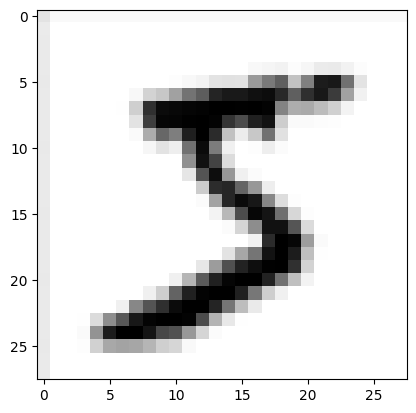

预测结果: 5


/opt/conda/envs/python35-paddle120-env/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 加载MNIST 784数据集
mnist = fetch_openml('mnist_784', version=1)

# 提取特征和标签
X, y = mnist['data'], mnist['target']

# 将标签转换为整数类型
y = y.astype(int)

# 随机划分为训练集和测试集，80%用于训练，20%用于测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建具有20个隐藏层的MLPClassifier模型，每层包含50个神经元
hidden_layers = (100,) * 5
mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=10, random_state=42, verbose=True, alpha=0.001)

# 训练模型
mlp.fit(X_train, y_train)

# 预测测试集
y_pred = mlp.predict(X_test)

# 计算并输出测试集的准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率: {accuracy}")

# 加载手写数字照片
image_path = '//home//aistudio//data/5.png'
image = Image.open(image_path).convert('L')  # 转换为灰度图
image = image.resize((28, 28))  # 调整大小为28x28像素

# 显示图片
plt.imshow(image, cmap='gray')
plt.show()

# 图像预处理
image_array = np.array(image).reshape(1, -1)  # 转换为1维数组
image_array = 255 - image_array  # 反转颜色
image_array = image_array / 255.0  # 归一化

# 使用训练好的模型进行预测
prediction = mlp.predict(image_array)
print(f"预测结果: {prediction[0]}")

### 三、实验结果与分析

（请给出实验内容中“实验与讨论”中的结果及其分析。）



